In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 84% 137M/163M [00:01<00:00, 138MB/s]
100% 163M/163M [00:01<00:00, 149MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
# createing list with mask & without mask
with_mask_list = os.listdir('/content/data/with_mask')
print(with_mask_list[0:5])
print(with_mask_list[-5:])


['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [ ]:
without_mask_list = os.listdir('/content/data/without_mask')
print(without_mask_list[0:5])
print(without_mask_list[-5:])

['without_mask_569.jpg', 'without_mask_997.jpg', 'without_mask_2648.jpg', 'without_mask_1823.jpg', 'without_mask_391.jpg']
['without_mask_3759.jpg', 'without_mask_3264.jpg', 'without_mask_1421.jpg', 'without_mask_1636.jpg', 'without_mask_3199.jpg']


In [ ]:
#printing the lengths
print(len(with_mask_list))
print(len(without_mask_list))

3725
3828


Creating Labels

with mask = 1

without mask = 0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(labels))

7553


In [ ]:
print(type(labels))

<class 'list'>


**Displaying the images**
**bold text**

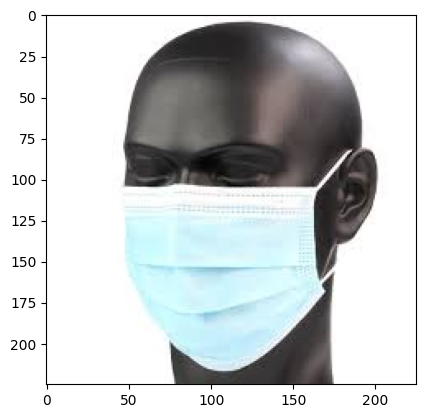

In [ ]:
img = Image.open('/content/data/with_mask/with_mask_846.jpg')
plt.imshow(img)
plt.show()

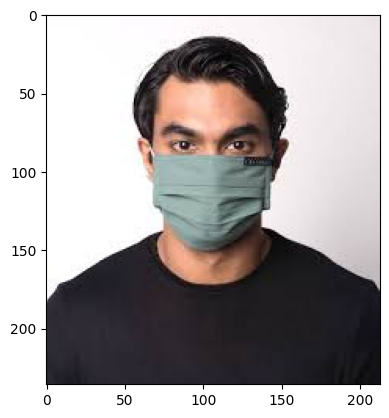

In [ ]:
img = Image.open('/content/data/with_mask/with_mask_2738.jpg')
plt.imshow(img)
plt.show()

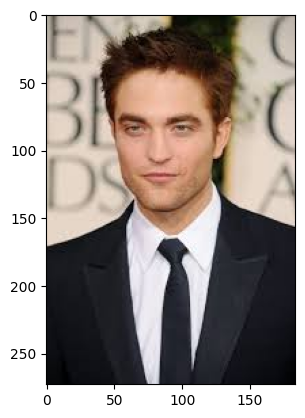

In [ ]:
img = Image.open('/content/data/without_mask/without_mask_2648.jpg')
plt.imshow(img)
plt.show()

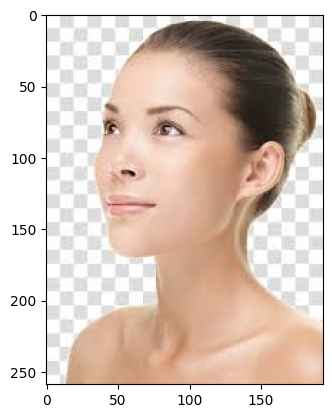

In [ ]:
img = Image.open('/content/data/without_mask/without_mask_2925.jpg')
plt.imshow(img)
plt.show()

Image **Procecing**

1 . Resize the images

2 . covert  the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img in with_mask_list:
  image = Image.open(with_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'



for img in without_mask_list:
  image = Image.open(without_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
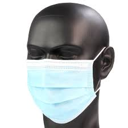

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X =np.array(data)

Y =np.array(labels)

In [ ]:
print(X)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[160 135 104]
   [162 138 107]
   [166 141 109]
   ...
   [ 31  30  36]
   [ 31  31  33]
   [ 30  29  35]]

  [[160 135 104]
   [162 138 107]
   [166 141 109]
   ...
   [ 31  30  36]
   [ 31  30  33]
   [ 31  30  36]]

  [[160 135 104]
   [162 138 107]
   [166 141 109]
   ...
   [ 31  30  36]
   [ 31  30  35]
   [ 31  30

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scalling

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.71372549 0.59215686 0.43137255]
   [0.6745098  0.57254902 0.40392157]
   [0.64313725 0.55686275 0.39215686]
   ...
   [0.03137255 0.01176471 0.        ]
   [0.03529412 0.01568627 0.00392157]
   [0.04313725 0.02352941 0.01176471]]

  [[0.70588235 0.58823529 0.42352941]
   [0.68235294 0.58431373 0.41568627]
   [0.65882353 0.57254902 0.40784314]
   ...
   [0.02745098 0.00784314 0.        ]
   [0.03529412 0.01568627 0.00392157]
   [0.03921569 0.01960784 0.00784314]]

  [[0.69803922 0.58823529 0.42352941]
   [0.69411765 0.59607843 0.42745098]
   [0.67058824 0.58823529 0.42352941]
   ...
   [0.02745098 0.00784314 0.        ]
   [0.03137255 0.01176471 0.        ]
   [0.03921569 0.01960784 0.00784314]]

  ...

  [[0.85098039 0.69803922 0.45490196]
   [0.82745098 0.69019608 0.4745098 ]
   [0.60784314 0.49019608 0.31764706]
   ...
   [0.28627451 0.18039216 0.08627451]
   [0.19215686 0.10588235 0.03137255]
   [0.11764706 0.05098039 0.        ]]

  [[0.80784314 0.65882353 0.43137255]
   [0.8

In [ ]:
print(X_train_scaled[0])

[[[0.71372549 0.59215686 0.43137255]
  [0.6745098  0.57254902 0.40392157]
  [0.64313725 0.55686275 0.39215686]
  ...
  [0.03137255 0.01176471 0.        ]
  [0.03529412 0.01568627 0.00392157]
  [0.04313725 0.02352941 0.01176471]]

 [[0.70588235 0.58823529 0.42352941]
  [0.68235294 0.58431373 0.41568627]
  [0.65882353 0.57254902 0.40784314]
  ...
  [0.02745098 0.00784314 0.        ]
  [0.03529412 0.01568627 0.00392157]
  [0.03921569 0.01960784 0.00784314]]

 [[0.69803922 0.58823529 0.42352941]
  [0.69411765 0.59607843 0.42745098]
  [0.67058824 0.58823529 0.42352941]
  ...
  [0.02745098 0.00784314 0.        ]
  [0.03137255 0.01176471 0.        ]
  [0.03921569 0.01960784 0.00784314]]

 ...

 [[0.85098039 0.69803922 0.45490196]
  [0.82745098 0.69019608 0.4745098 ]
  [0.60784314 0.49019608 0.31764706]
  ...
  [0.28627451 0.18039216 0.08627451]
  [0.19215686 0.10588235 0.03137255]
  [0.11764706 0.05098039 0.        ]]

 [[0.80784314 0.65882353 0.43137255]
  [0.81960784 0.68235294 0.47058824]


Building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [ ]:
number_classes = 2

model = tf.keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_classes,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - acc: 0.7070 - loss: 0.6130 - val_acc: 0.8793 - val_loss: 0.2701
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8909 - loss: 0.2766 - val_acc: 0.8612 - val_loss: 0.3104
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9041 - loss: 0.2406 - val_acc: 0.9240 - val_loss: 0.2086
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9376 - loss: 0.1853 - val_acc: 0.9223 - val_loss: 0.2014
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9470 - loss: 0.1587 - val_acc: 0.9322 - val_loss: 0.1970


In [ ]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy = ',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9452 - loss: 0.1431
Test Accuracy =  0.9338186383247375


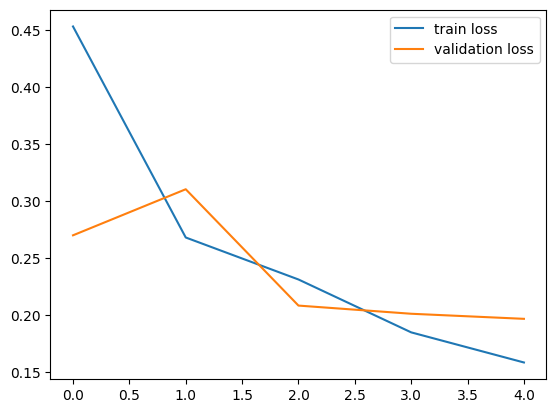

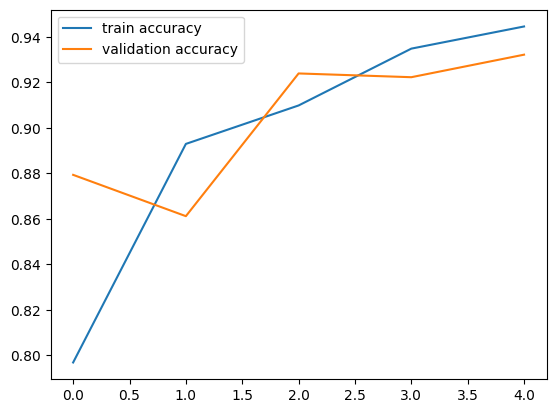

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive** **System**

Enter the path of the image to be tested: /content/nancy.jpg


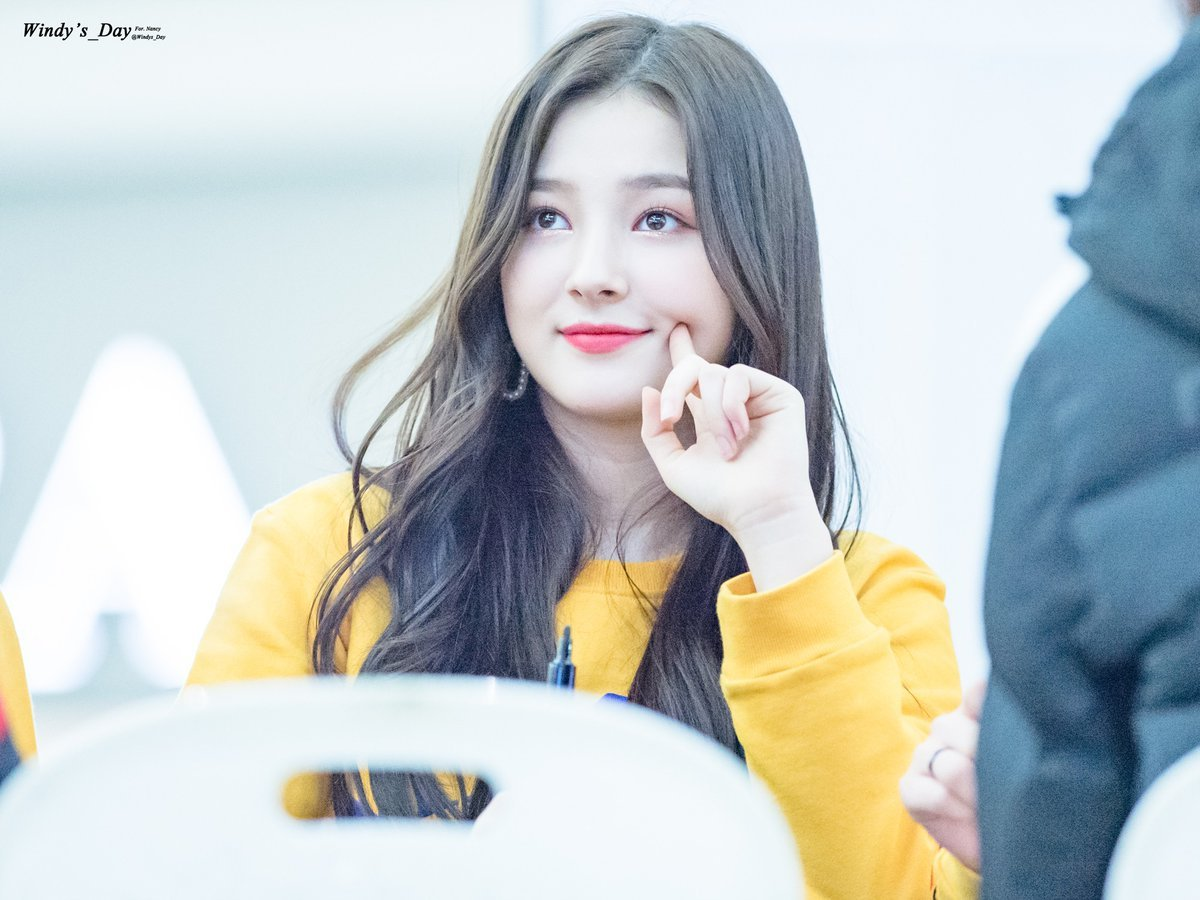

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.10145574 0.89854425]]
1
The person in the image is with mask


In [ ]:
input_img_path = input('Enter the path of the image to be tested: ')

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img,(128,128))

input_img_scaled = input_img_resize/255

input_img_reshaped = np.reshape(input_img_scaled,[1,128,128,3])

input_prediction = model.predict(input_img_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is without mask')
else:
  print('The person in the image is with mask')

Path of the image to be predicted: /content/WhatsApp Image 2024-12-29 at 5.53.23 PM.jpeg


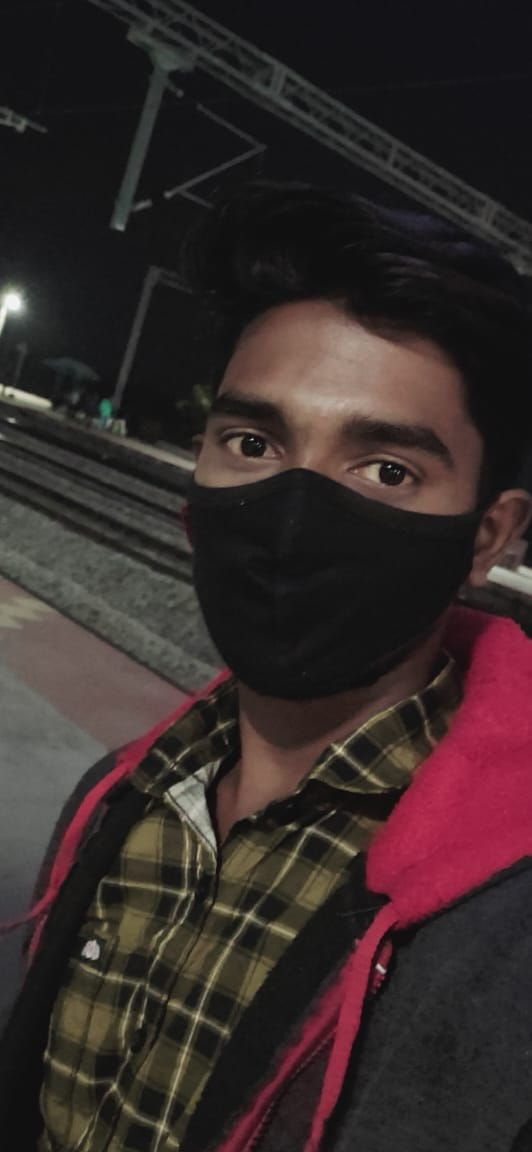

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.11457013 0.8854299 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

[[0.11457013 0.8854299 ]]
1
Path of the image to be predicted: /content/WhatsApp Image 2024-12-29 at 5.53.23 PM.jpeg


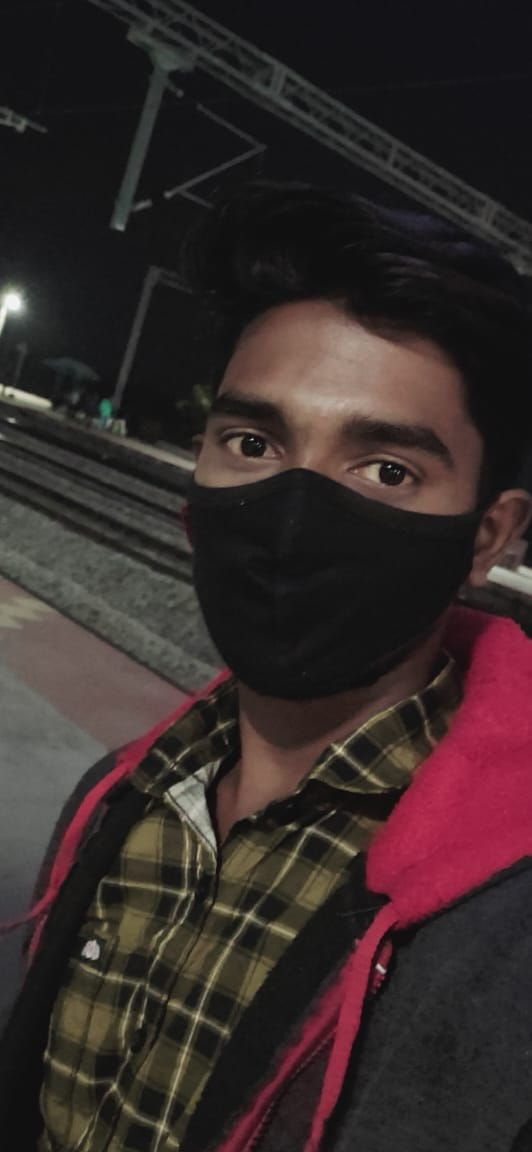

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The person in the image is wearing a mask


In [ ]:
def predict_label(input_image_path):


  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  input_pred_label = np.argmax(input_prediction)

print(input_prediction)

print(input_pred_label)

input_image_path = input('Path of the image to be predicted: ')

predict_label(input_image_path)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
